<a href="https://colab.research.google.com/github/Sandeep5500/Basic-MNIST-model/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A Simple 97%+ accuracy model on the MNIST dataset**

In [ ]:
import tensorflow as tf
import numpy as np
import csv

In [ ]:
def load_data(filename):
    labels = []
    images = []
    with open(filename, 'r') as csvfile:
        csvreader = csv.reader(csvfile) 
        for row in csvreader:
            labels.append(row[0])
            x = row[1:]
            img = np.array(x).reshape(28,28)
            images.append(img)
    images = np.array(images).astype(float)
    labels = np.array(labels).astype(float)
    return images, labels

training_images, training_labels = load_data("/content/sample_data/mnist_train_small.csv")
testing_images, testing_labels = load_data("/content/sample_data/mnist_test.csv")


print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(20000, 28, 28)
(20000,)
(10000, 28, 28)
(10000,)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(training_labels)) + 1, activation='softmax')
])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
training_images =  np.expand_dims(training_images,axis=-1)
testing_images =  np.expand_dims(testing_images,axis=-1)

print(training_images.shape)
print(testing_images.shape)

(20000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
train_datagen = ImageDataGenerator(
      rescale = 1./255
    )

validation_datagen = ImageDataGenerator(
    rescale = 1./255)

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(generator = train_datagen.flow(training_images, training_labels,batch_size=32),
steps_per_epoch = len(training_images)/32,
epochs = 2,
validation_data = validation_datagen.flow(testing_images, testing_labels,batch_size =32),
validation_steps = len(testing_images)/32,
verbose = 1)

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/2
625/625 [==============================] - 6s 10ms/step - loss: 0.0901 - accuracy: 0.9724 - val_loss: 0.0706 - val_accuracy: 0.9795
Epoch 2/2
625/625 [==============================] - 6s 10ms/step - loss: 0.0539 - accuracy: 0.9845 - val_loss: 0.0776 - val_accuracy: 0.9764


[173.37277221679688, 0.8626999855041504]

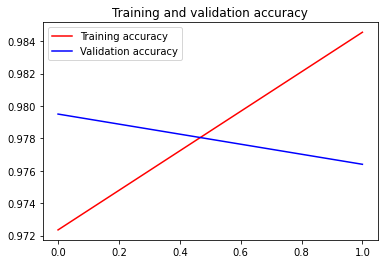

<Figure size 432x288 with 0 Axes>

In [ ]:

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.show()